In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import oneHotEncoder
from NeuralNetwork import NeuralNetwork

%matplotlib inline

### Load data and One-Hot-Encode

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw2train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw2dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw2eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel, 9)
devLabel = oneHotEncoder(devLabel, 9)
evalLabel = oneHotEncoder(evalLabel, 9)

In [3]:
print(trainFeature.shape, devFeature.shape, evalFeature.shape)

(5060, 1120) (731, 1120) (909, 1120)


In [4]:
# Universial Hyper-parameters
batchSize = 50

### Relu non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.02067 s
Reach the maximum iteration	 574.95 s
At 177 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.55790513834
Development Accuracy:	 0.398084815321
Evaluation Accuracy:	 0.400440044004


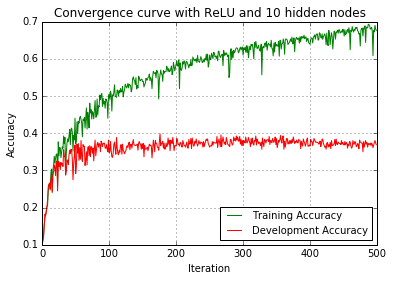

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.0104 s
Reach the maximum iteration	 682.87 s
At 468 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.409683794466
Development Accuracy:	 0.352941176471
Evaluation Accuracy:	 0.338833883388


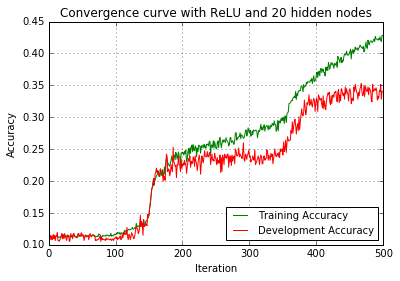

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04937 s
Reach the maximum iteration	 752.83 s
At 217 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.664031620553
Development Accuracy:	 0.450068399453
Evaluation Accuracy:	 0.430143014301


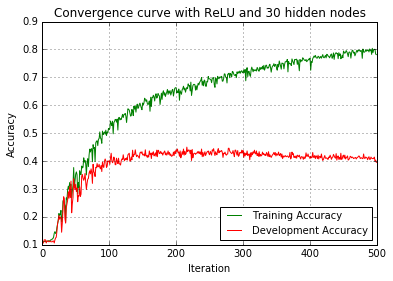

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.02668 s
Reach the maximum iteration	 535.35 s
At 158 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.644861660079
Development Accuracy:	 0.447332421341
Evaluation Accuracy:	 0.411441144114


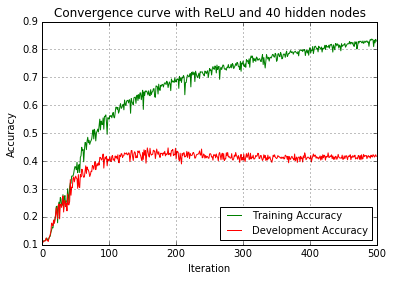

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00623 s
Reach the maximum iteration	 543.5 s
At 128 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.668972332016
Development Accuracy:	 0.424076607387
Evaluation Accuracy:	 0.416941694169


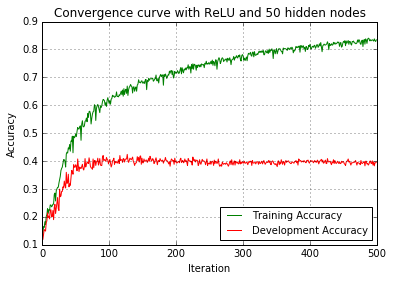

In [5]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.1, 0.1, 0.09, 0.08, 0.06]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='relu', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)
    
    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with ReLU and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Sigmoid non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.01868 s
Reach the maximum iteration	 993.08 s
At 192 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.639920948617
Development Accuracy:	 0.451436388509
Evaluation Accuracy:	 0.409240924092


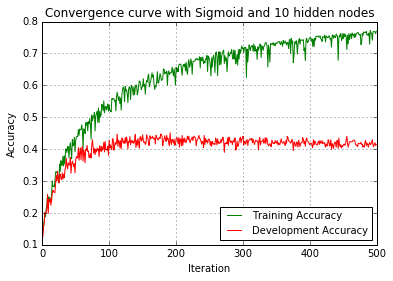

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.02928 s
Reach the maximum iteration	 1062.55 s
At 245 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.831818181818
Development Accuracy:	 0.491108071135
Evaluation Accuracy:	 0.438943894389


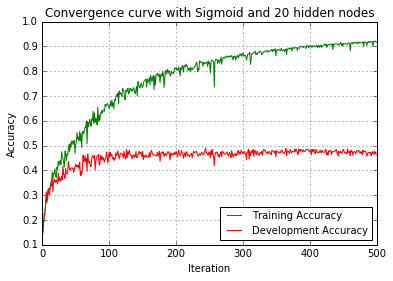

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00784 s
Reach the maximum iteration	 1167.99 s
At 116 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.765415019763
Development Accuracy:	 0.518467852257
Evaluation Accuracy:	 0.464246424642


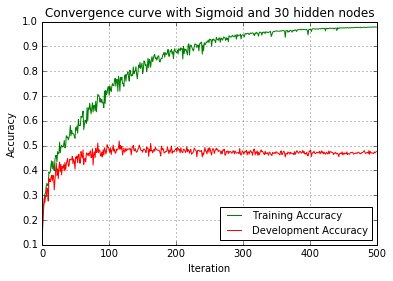

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.03604 s
Reach the maximum iteration	 1218.88 s
At 104 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.77233201581
Development Accuracy:	 0.500683994528
Evaluation Accuracy:	 0.446644664466


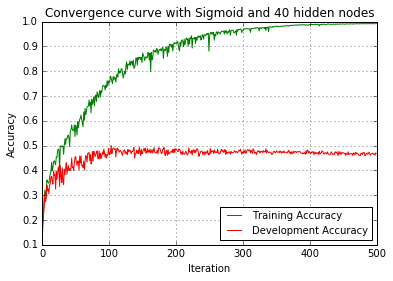

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.0148 s
Reach the maximum iteration	 1211.6 s
At 111 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.826679841897
Development Accuracy:	 0.502051983584
Evaluation Accuracy:	 0.476347634763


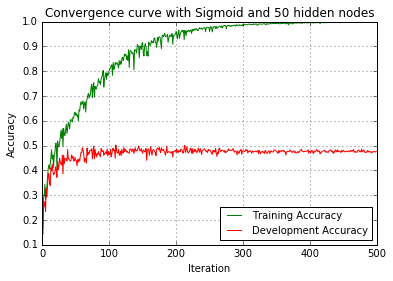

In [6]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='sigmoid', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Sigmoid and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Tanh non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.02657 s
Reach the maximum iteration	 278.3 s
At 252 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.592292490119
Development Accuracy:	 0.44049247606
Evaluation Accuracy:	 0.416941694169


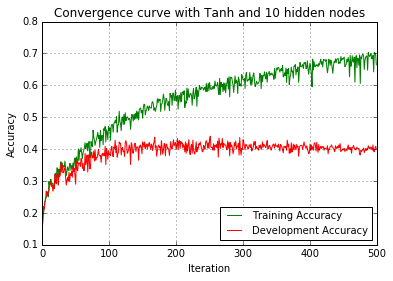

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.01062 s
Reach the maximum iteration	 303.18 s
At 151 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.602964426877
Development Accuracy:	 0.478796169631
Evaluation Accuracy:	 0.404840484048


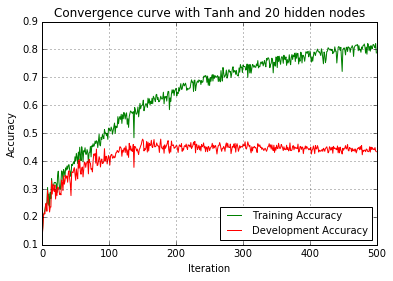

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00614 s
Reach the maximum iteration	 322.6 s
At 209 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.727470355731
Development Accuracy:	 0.473324213406
Evaluation Accuracy:	 0.453245324532


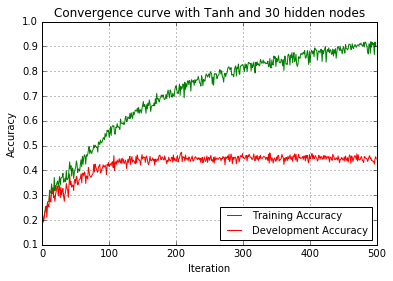

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.0108 s
Reach the maximum iteration	 346.96 s
At 272 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.854545454545
Development Accuracy:	 0.484268125855
Evaluation Accuracy:	 0.438943894389


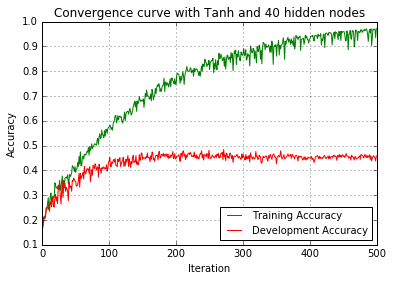

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00812 s
Reach the maximum iteration	 393.53 s
At 256 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.831225296443
Development Accuracy:	 0.484268125855
Evaluation Accuracy:	 0.436743674367


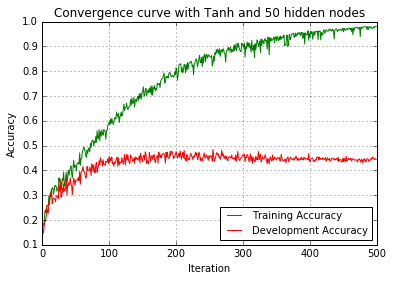

In [5]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)

    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='tanh', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Tanh and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()